**1. Припустимо, що у вас є багатошаровий перцептрон, що складається з одного вхідного шару з 10 нейронами, за яким є ще один прихований шар з 50 нейронами і один вихідний шар з 3 нейронами. Всі штучні нейрони застосовують функцію активації ReLU.**



* **Яка форма вхідної матриці $X$?**

$X$ має розмірність (10 X 1).

* **Що можна сказати про форму вектора ваг $W_h$ прихованого шару?**

$W_h$ має розмірність (50 X 10).

* **... і форму його вектора зсувів $b_h$?**

$b_h$ — вектор-стовбчик довжини 50.

* **Яка форма вектора ваг $W_0$ вихідного шару?**

$W_0$ має розмірність (3 X 50).

* **... і форма його вектора зсувів $b_0$?**

$b_0$ — вектор-стовбчик довжини 3.

* **Яка форма вихідної матриці $Y$ мережі?**

$Y$ має розмірність (3 X 1).

* **Напишіть рівняння, яке обчислює вихідну матрицю $Y$ мережі як функцію від $X$, $W_h$, $h_b$, $W_0$ та $b_0$.**

$Y = ReLU(W_0 * ReLU(W_h * X + b_h) + b_0)$

**2. Порівняйте точність класифікації нейронної мережі з різними нелінійними функціями активації з точністю класифікації нейронної мережі з лінійною функцією активації.**

**Примітка:** для тестів використав датасет Fashion MNIST, попередню обробку даних та схему нейронної мережі взяв з Лекції 3.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()
y_train_oh = keras.utils.np_utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.np_utils.to_categorical(y_val, 10)
x_train_float = x_train.astype(np.float) / 255 - 0.5
x_val_float = x_val.astype(np.float) / 255 - 0.5

In [ ]:
activations = ['linear', 'elu', 'sigmoid', 'softmax']

for activation in activations:
  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(784, activation))
  model.add(L.Dense(128, activation))
  model.add(L.Dense(10, activation))

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  results = model.fit(x_train_float.reshape(-1, 28*28), y_train_oh, 
                      batch_size=64, epochs=5, validation_data=
                      (x_val_float.reshape(-1, 28*28), y_val_oh))
  
  print(activation + ', best val_accuracy: ' +
        str(max(results.history['val_accuracy'])) + '\n')

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 7.5237 - accuracy: 0.2431 - val_loss: 7.9220 - val_accuracy: 0.2494
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 7.8683 - accuracy: 0.2496 - val_loss: 8.0429 - val_accuracy: 0.2504
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 7.9285 - accuracy: 0.2503 - val_loss: 8.0429 - val_accuracy: 0.2504
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 7.9285 - accuracy: 0.2503 - val_loss: 8.0429 - val_accuracy: 0.2504
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 7.9285 - accuracy: 0.2503 - val_loss: 8.0429 - val_accuracy: 0.2504
linear, best val_accuracy: 0.25040000677108765

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 7.8603 - accuracy: 0.3764 - val_loss: 9.7797 - val_accuracy: 0.3574
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 9.2688 - accuracy: 0.3475 - val_l

Бачимо, що нелінійні функції активації забезпечують більшу точність моделі.

**3. Для двошарової нейронної мережі з фіксованою функцією активації $a(x)$ побудуйте графік залежності часу навчання нейронної мережі і точності класифікації від кількості нейронів в прихованому шарі мережі.**
<center>$a(x)=\frac{1}{1 + e^{-x}}$</center>

**Примітка:** зазначена функція активації є стандартною функцією sigmoid(x).

In [ ]:
import matplotlib.pyplot as plt
import time

In [ ]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
neurons = range(5, 200, 5)
time_callback = TimeHistory()
times = []
accuracies = []

for i in neurons:
  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(784, activation='sigmoid'))
  model.add(L.Dense(i, activation='sigmoid'))
  model.add(L.Dense(10, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  results = model.fit(x_train_float.reshape(-1, 28*28), y_train_oh, 
                      batch_size=64, epochs=1, validation_data=
                      (x_val_float.reshape(-1, 28*28), y_val_oh),
                      callbacks=[time_callback])
  times += time_callback.times
  accuracies.append(results.history['val_accuracy'][-1])

938/938 [==============================] - 8s 8ms/step - loss: 0.5628 - accuracy: 0.7993 - val_loss: 0.4486 - val_accuracy: 0.8381


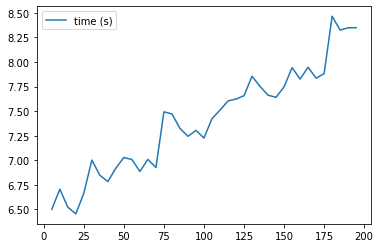

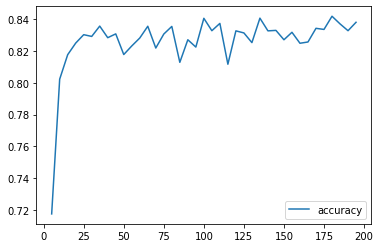

In [ ]:
plt.plot(neurons, times, label='time (s)')
plt.legend()
plt.show()

plt.plot(neurons, accuracies, label='accuracy')
plt.legend()
plt.show()

**4. Побудуйте графік залежності часу навчання нейронної мережі і точності класифікації від кількості прихованих шарів (всі приховані шари однакового розміру) для багатошарової нейронної мережі з фіксованою функцією активації $a(x)$.**
<center>$a(x)=th(x)=\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$</center>

In [ ]:
neurons_in_layer = 50
layers = range(1, 20)
time_callback = TimeHistory()
times = []
accuracies = []

for i in layers:
  K.clear_session()
  model = M.Sequential()
  model.add(L.Dense(784, activation='tanh'))
  for j in range(0, i):
    model.add(L.Dense(neurons_in_layer, activation='tanh'))
  model.add(L.Dense(10, activation='tanh'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  results = model.fit(x_train_float.reshape(-1, 28*28), y_train_oh, 
                      batch_size=64, epochs=1, validation_data=
                      (x_val_float.reshape(-1, 28*28), y_val_oh),
                      callbacks=[time_callback])
  times += time_callback.times
  accuracies.append(results.history['val_accuracy'][-1])

938/938 [==============================] - 10s 9ms/step - loss: 8.0574 - accuracy: 0.1003 - val_loss: 8.0574 - val_accuracy: 0.1002


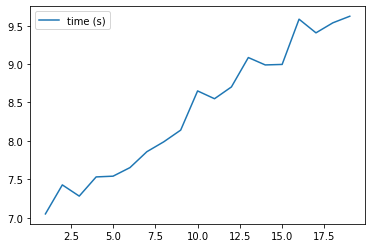

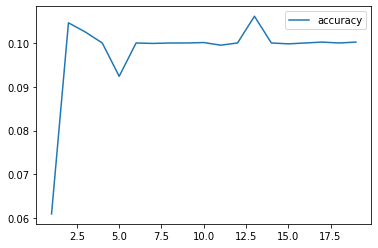

In [ ]:
plt.plot(layers, times, label='time (s)')
plt.legend()
plt.show()

plt.plot(layers, accuracies, label='accuracy')
plt.legend()
plt.show()